In [3]:
%matplotlib inline

import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import scipy.misc
import glob
import imageio


importing libraries


# Quick Look at the Data

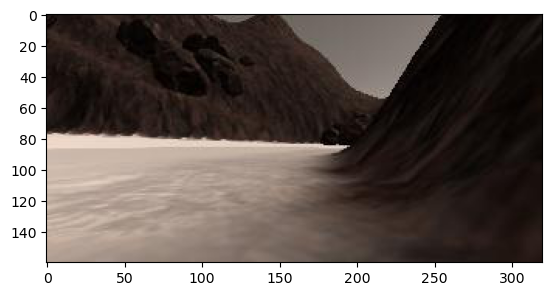

In [8]:
path = '../test_dataset/IMG/*'
img_list = glob.glob(path)
idx = np.random.randint(0, len(img_list)-1)
image = mpimg.imread(img_list[idx])
plt.imshow(image)

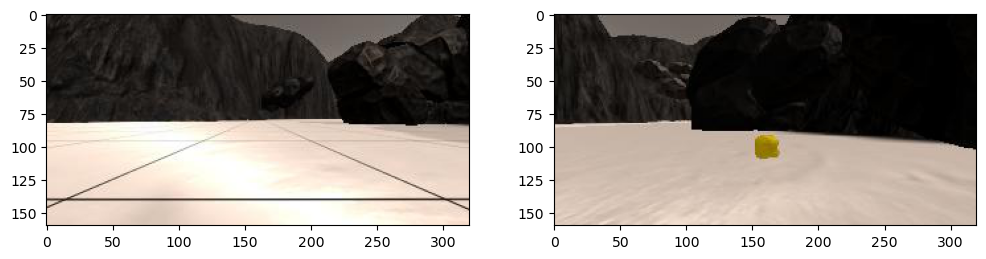

In [22]:
# In the simulator you can toggle on a grid on the ground for calibration
# You can also toggle on the rock samples with the © (zero) key.
# Here's an example of the grid and one of the rocks

example_grid = "../calibration_images/example_grid1.jpg"
example_rock = "../calibration_images/example_rock1.jpg"
grid_img = mpimg.imread (example_grid)
rock_img = mpimg.imread(example_rock)
fig = plt. figure(figsize=(12, 3))
plt. subplot (121)
plt.imshow(grid_img)
plt. subplot (122)
plt.imshow(rock_img)

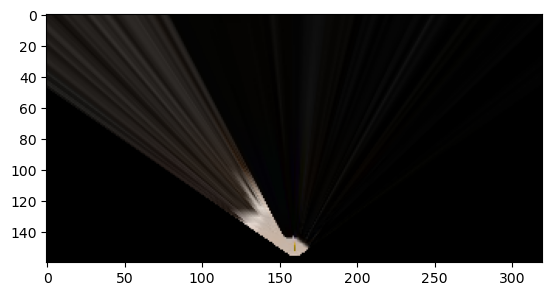

In [35]:
# Define a function to perform a perspective transform
# I've used the example grid image above to choose source points for the
# grid cell in front of the rover (each grid cell is 1 square meter in the sim)
# Define a function to perform a perspective transform
def perspect_transform(img, src, dst):
    
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))

    return warped

dst = 3
bottom_offset = 5
source = np. float32([[14, 140],
                     [300, 140],
                     [200, 95],
                     [120, 95]])

destination = np.float32([[image.shape[1] / 2 - dst, image.shape[0] - bottom_offset],
                          [image.shape[1] / 2 + dst, image.shape[0] - bottom_offset],
                          [img.shape[1] / 2 + dst, image.shape[0] - 2*dst - bottom_offset],
                          [img.shape[1] / 2 - dst, image.shape[0] - 2*dst - bottom_offset]])

warped= perspect_transform(rock_img,source, destination)
plt.imshow(warped)

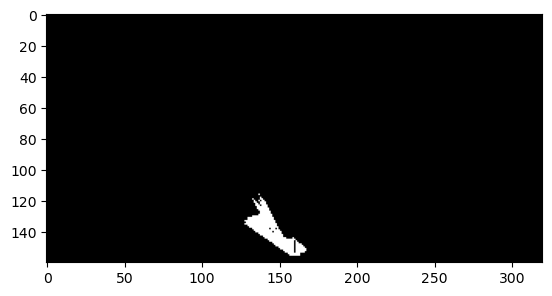

In [43]:
#Identify pixels above the threshold
# Threshold of RGB > 160 does a nice job of identifying ground pixels only
def color_thresh(img, rgb_thresh=(160, 160, 160)) :
    # Create an array of Zeros same xy size as img, but single channel
    color_select = np.zeros_like(img[:,:,0])
    # Require that each pixel be above all three threshold values in RGB
    # above thresh will now contain a boolean array with "True"
    # where threshold was met
    above_thresh = (img[:,:, 0] > rgb_thresh[0])\
    &(img[:,:, 1] > rgb_thresh[1]) \
      &(img[:,:, 2] > rgb_thresh[2])
    color_select[above_thresh]=1
      # Return the binary image
    return color_select
threshed = color_thresh(warped)
plt.imshow(threshed, cmap='gray')
#scipy.misc.imsave('../output/warped threshed.jpg', threshed*255)

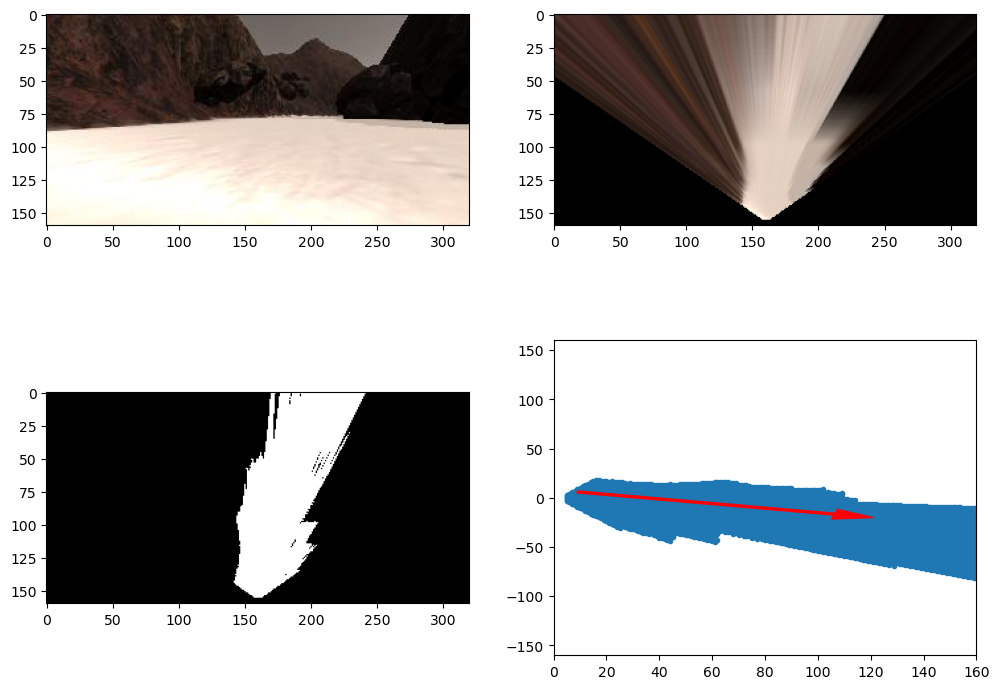

In [57]:
def rover_coords(binary_img):
    # Identify nonzero pixels
    ypos, xpos = binary_img.nonzero()
    x_pixel = -(ypos - binary_img.shape[0]).astype(np.float32)
    y_pixel = -(xpos - binary_img.shape[0]).astype(np.float32)
    
    return x_pixel, y_pixel

# Define a function to convert to radial coords in rover space
def to_polar_coords(x_pixel, y_pixel):
    # Convert (x_pixel, y_pixel) to (distance, angle)
    # in polar coordinates in rover space
    # Calculate distance to each pixel
    dist=np.sqrt(x_pixel**2+y_pixel**2)
    angles=np.arctan2(y_pixel,x_pixel)
    return dist, angles

# Define a function to apply a rotation to pixel positions
def rotate_pix(xpix, ypix, yaw):
    yaw;rad = yaw * np.pi / 180
    return xpix_rotated, ypix_rotated
# Define a function to perform a translation
def translate_pix(xpix_rot, ypix_rot, xpos, ypos, scale):
    # Apply a scaling and a translation
    xpix_translated =(xpix_rot) + xpos
    ypix_translated =(ypix_rot) + ypos
    # Return the result
    return xpix_translated, ypix_translated
# Define a function to apply rotation and translation (and clipping)
# Once you define the two functions above this function should work
def pix_to_world(xpix, ypix, xpos, ypos, yaw, world_size, scale):
    # Apply rotation
    return x_pix_world, y_pix_world
# Grab another random image
idx = np.random.randint(0, len(img_list)-1)
image = mpimg.imread(img_list[idx])
warped = perspect_transform(image, source, destination)
threshed = color_thresh(warped)

# Calculate pixel values in rover-centric coords and distance/angle to all pixels
xpix, ypix = rover_coords(threshed)
dist, angles = to_polar_coords(xpix, ypix)
mean_dir = np.mean(angles)

# Calculate pixel values in rover-centric coords and distance/angle to all pixels
xpix, ypix = rover_coords(threshed)
dist, angles = to_polar_coords(xpix, ypix)
mean_dir = np.mean(angles)

# Do some plotting 
fig = plt.figure(figsize=(12,9))
plt.subplot(221) 
plt.imshow(image)
plt.subplot(222)
plt.imshow(warped)
plt.subplot(223)
plt.imshow(threshed, cmap='gray')
plt.subplot(224)
plt.plot(xpix, ypix, '.') 
plt.ylim(-160, 160)
plt.xlim(0, 160)
arrow_length = 100
x_arrow = arrow_length * np.cos(mean_dir)
y_arrow = arrow_length * np.sin(mean_dir)
plt.arrow(9, 6, x_arrow, y_arrow, color='red', zorder=2, head_width=10, width=2)
